In [138]:
# import libraries for modeling
import os
import tensorflow as tf
import tensorflow_hub as hub
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [134]:
# import basic python libraries 
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [135]:
# define function to import image 
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [136]:
# create load image function to reshape 
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [137]:
# simple function to show image 
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

In [139]:
# define content and style image locations 
content_images_directory = 'image_files/content_images'
style_images_directory = 'image_files/style_images'

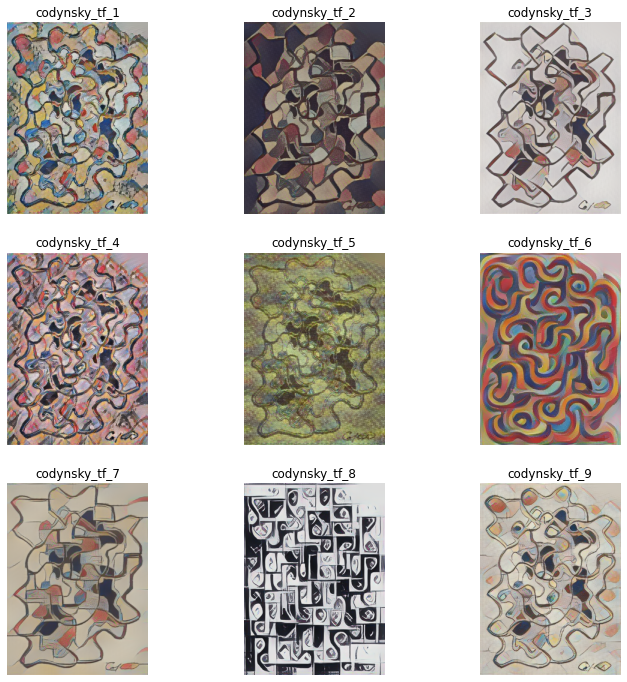

In [143]:
# utilize pre-built tf model and apply styles of all style images to all content images
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
content_path = 'image_files/content_images/TASTE_EXPERIENCE_01.jpeg'

for style_name in os.listdir(style_images_directory):
    num = os.listdir(style_images_directory).index(style_name) + 1
    style = os.path.join(style_images_directory, style_name)
    style_path = style
    style_image = load_img(style_path)
    stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
    tensor_to_image(stylized_image)
    file_name=f"image_files/generated_images/codynsky_tf_{num}_.png"
    tensor_to_image(stylized_image).save(file_name)
    plt.subplot(3, 3, num)
    plt.axis('off')
    imshow(stylized_image, f"codynsky_tf_{num}")

            